<a href="https://colab.research.google.com/github/UKJaagadhep/Data-science-and-machine-learning/blob/main/Multiclass%20Disease%20Classification/ML_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as p
import numpy as n
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.random import set_seed
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer, BatchNormalization, Input, Layer, Dropout
from tensorflow.keras.metrics import Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Precision, Recall, F1Score, AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import L1, L2
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve

In [ ]:
data=p.read_csv("/content/Blood_samples_dataset_balanced_2(f).csv")
data_ = p.read_csv("/content/blood_samples_dataset_test.csv")
display(data)
display(data_)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [ ]:
data = pd.concat([data, data_], axis=0, ignore_index=True)

In [ ]:
data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [ ]:
data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.395643,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.266795,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.189918,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.335778,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.597671,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [ ]:
data.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [ ]:
input_data = data.drop('Disease',axis=1)
display(input_data)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


In [ ]:
output_data = data['Disease']
display(output_data)


0        Healthy
1       Diabetes
2       Thalasse
3         Anemia
4       Thalasse
          ...   
2832    Diabetes
2833    Heart Di
2834      Anemia
2835    Diabetes
2836    Diabetes
Name: Disease, Length: 2837, dtype: object

In [ ]:
output_data.unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc',
       'Heart Di'], dtype=object)

In [ ]:
output_data.replace(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc','Heart Di'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
output_data

0       0
1       1
2       2
3       3
4       2
       ..
2832    1
2833    5
2834    3
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int64

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(input_data, output_data, test_size = 0.25, stratify = output_data, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, stratify = y_temp, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2127, 24)
(355, 24)
(355, 24)
(2127,)
(355,)
(355,)


In [ ]:
norm=Normalization()
x_train = norm(x_train)
display(x_train)


<tf.Tensor: shape=(2127, 24), dtype=float32, numpy=
array([[0.7987682 , 0.40001482, 0.47879982, ..., 0.75072706, 0.9337412 ,
        0.65549296],
       [0.65550774, 0.6895913 , 0.11149017, ..., 0.36596057, 0.11794414,
        0.6462019 ],
       [0.40032604, 0.19581774, 0.7435287 , ..., 0.3080702 , 0.29278716,
        0.5212845 ],
       ...,
       [0.02395924, 0.19115047, 0.20143281, ..., 0.64918095, 0.300423  ,
        0.19951314],
       [0.35373443, 0.7577568 , 0.7550065 , ..., 0.4078905 , 0.4268626 ,
        0.5320998 ],
       [0.39901677, 0.50825405, 0.77739424, ..., 0.7742194 , 0.71417654,
        0.60917675]], dtype=float32)>

In [ ]:
norm_val =Normalization()
x_val = norm_val(x_val)
display(x_val)


<tf.Tensor: shape=(355, 24), dtype=float32, numpy=
array([[0.20959352, 0.585042  , 0.77128375, ..., 0.41505775, 0.24004468,
        0.25202006],
       [0.3484926 , 0.31257856, 0.28494924, ..., 0.5155567 , 0.49024132,
        0.77065736],
       [0.09970243, 0.4994432 , 0.24204488, ..., 0.51006806, 0.10306624,
        0.41703236],
       ...,
       [0.45897073, 0.3640671 , 0.29385382, ..., 0.6552029 , 0.50823015,
        0.80849594],
       [0.34435552, 0.783918  , 0.5821714 , ..., 0.6067188 , 0.39514452,
        0.13402146],
       [0.08077918, 0.42238083, 0.7478593 , ..., 0.5138637 , 0.08861088,
        0.1481238 ]], dtype=float32)>

In [ ]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_val = tf.convert_to_tensor(x_val)
y_val = tf.convert_to_tensor(y_val)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))

In [ ]:
train_data = train_data.shuffle(8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = val_data.shuffle(8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
regularization_rate = 0.01
dropout_rate = 0.2

In [ ]:
model = Sequential([
    Dense(128, activation = 'ReLU', kernel_regularizer = L2(regularization_rate )),
    BatchNormalization(),
    Dropout(rate = dropout_rate),
    Dense(64, activation = 'ReLU', kernel_regularizer = L2(regularization_rate )),
    BatchNormalization(),
    Dense(64, activation = 'ReLU', kernel_regularizer = L2(regularization_rate )),
    BatchNormalization(),
    Dropout(rate = dropout_rate),
    Dense(32, activation = 'ReLU', kernel_regularizer = L2(regularization_rate )),
    BatchNormalization(),
    Dense(16, activation = 'ReLU', kernel_regularizer = L2(regularization_rate )),
    BatchNormalization(),
    Dropout(rate = dropout_rate),
    Dense(6, activation = 'softmax', kernel_regularizer = L2(regularization_rate )),
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
es_callback = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5, verbose = 1, mode = 'auto', baseline = None, restore_best_weights = True )

In [ ]:
def scheduler(epoch, lr):
  if epoch < 3:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
lrs_callback = LearningRateScheduler(scheduler, verbose = 1)

In [ ]:
rlrop_callback = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 2, verbose = 1 )

In [ ]:
history = model.fit(train_data, validation_data = val_data, epochs = 100, verbose = 1,callbacks = [es_callback, lrs_callback, rlrop_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
67/67 [==============================] - 0s 6ms/step - loss: 0.2838 - accuracy: 0.9666 - val_loss: 0.4305 - val_accuracy: 0.9408 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.9577 - val_loss: 0.4026 - val_accuracy: 0.9465 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.9614 - val_loss: 0.3764 - val_accuracy: 0.9437 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 4/100
57/67 [========================>.....] - ETA: 0s - loss: 0.2864 - accuracy: 0.9693
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.048374486155809e-05.
67/67 [==============================] - 0s 4ms

In [ ]:
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(1)

In [ ]:
model.evaluate(test_data)

355/355 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.9408


[0.3821108639240265, 0.9408450722694397]

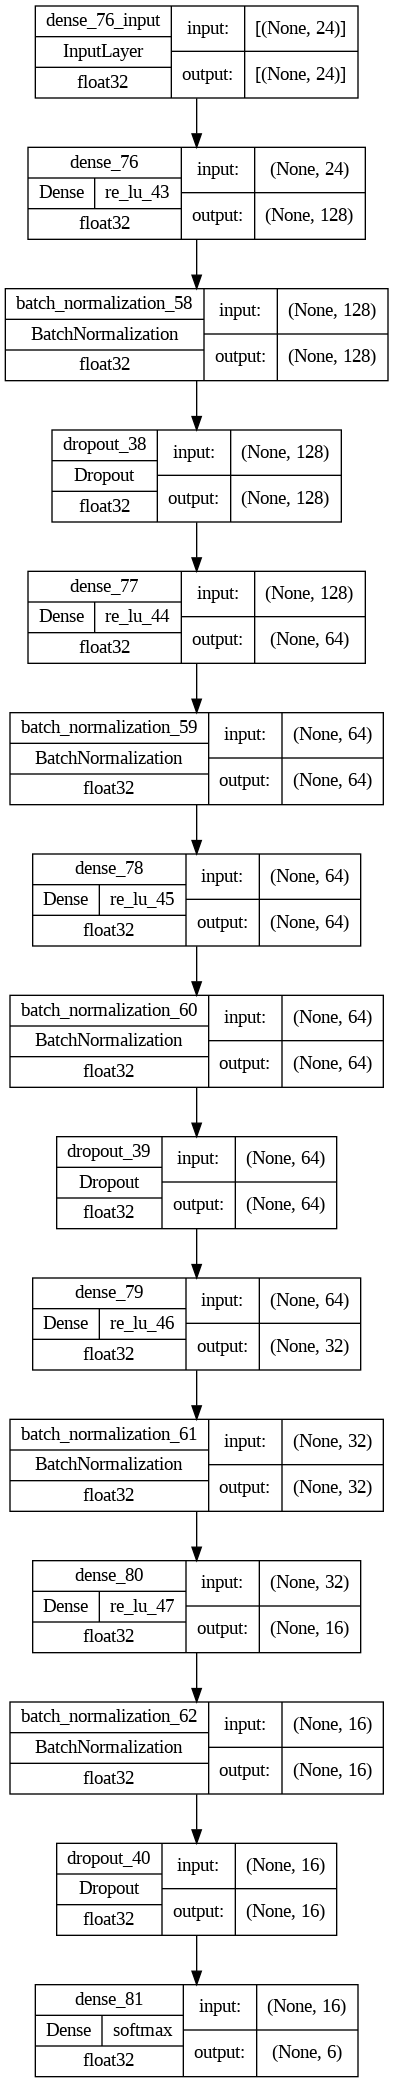

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model.png', show_layer_activations = True, show_dtype = True)

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
columns = input_data.columns
input_list = []
for i in columns:
  inp = eval(input("Enter {} :
  ".format(i)))
  input_list.append(inp)

Enter Glucose : 0.107165
Enter Cholesterol : 0.603341
Enter Hemoglobin : 0.791215
Enter Platelets : 0.17884
Enter White Blood Cells : 0.718674
Enter Red Blood Cells : 0.825769
Enter Hematocrit : 0.753657
Enter Mean Corpuscular Volume : 0.396669
Enter Mean Corpuscular Hemoglobin : 0.762667
Enter Mean Corpuscular Hemoglobin Concentration : 0.732671
Enter Insulin : 0.232877
Enter BMI : 0.119338
Enter Systolic Blood Pressure : 0.142591
Enter Diastolic Blood Pressure : 0.474378
Enter Triglycerides : 0.731369
Enter HbA1c : 0.489514
Enter LDL Cholesterol : 0.102679
Enter HDL Cholesterol : 0.861035
Enter ALT : 0.609068
Enter AST : 0.677415
Enter Heart Rate : 0.979192
Enter Creatinine : 0.55496
Enter Troponin : 0.472428
Enter C-reactive Protein : 0.621687


In [ ]:
input_list_ = tf.convert_to_tensor(input_list)
input_list_ = tf.expand_dims(input_list_, axis = 0)

In [ ]:
input_list_


<tf.Tensor: shape=(1, 24), dtype=float32, numpy=
array([[0.107165, 0.603341, 0.791215, 0.17884 , 0.718674, 0.825769,
        0.753657, 0.396669, 0.762667, 0.732671, 0.232877, 0.119338,
        0.142591, 0.474378, 0.731369, 0.489514, 0.102679, 0.861035,
        0.609068, 0.677415, 0.979192, 0.55496 , 0.472428, 0.621687]],
      dtype=float32)>

In [ ]:
prediction = model.predict(input_list_)

1/1 [==============================] - 0s 35ms/step


In [ ]:
argmax = tf.math.argmax(prediction[0])

In [ ]:
if argmax == 0:
  print("Patient is healthy.")
if argmax == 1:
  print("Patient is suffering from Diabetes.")
if argmax == 2:
  print("Patient is suffering from Thalassemia.")
if argmax == 3:
  print("Patient is suffering from Anemia.")
if argmax == 4:
  print("Patient is suffering from Thrombosis.")
if argmax == 5:
  print("Patient is suffering from Heart Disease.")

Patient is suffering from Thrombosis.
